In [89]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

In [90]:
path = './instances/RC207.txt'

In [91]:
def to_point(line):
    mapping = ['number', 'x', 'y', 'demand', 'ready_time', 'due_date', 'service_time']
    line = line.replace('\n', '').split()
    return {k:int(v) for k,v in zip(mapping, line)}

In [92]:
with open(path, 'r') as f:
    data = f.readlines()
points = list(map(to_point, data[9:]))

In [93]:
G = nx.Graph()
G.add_nodes_from(range(len(points)))

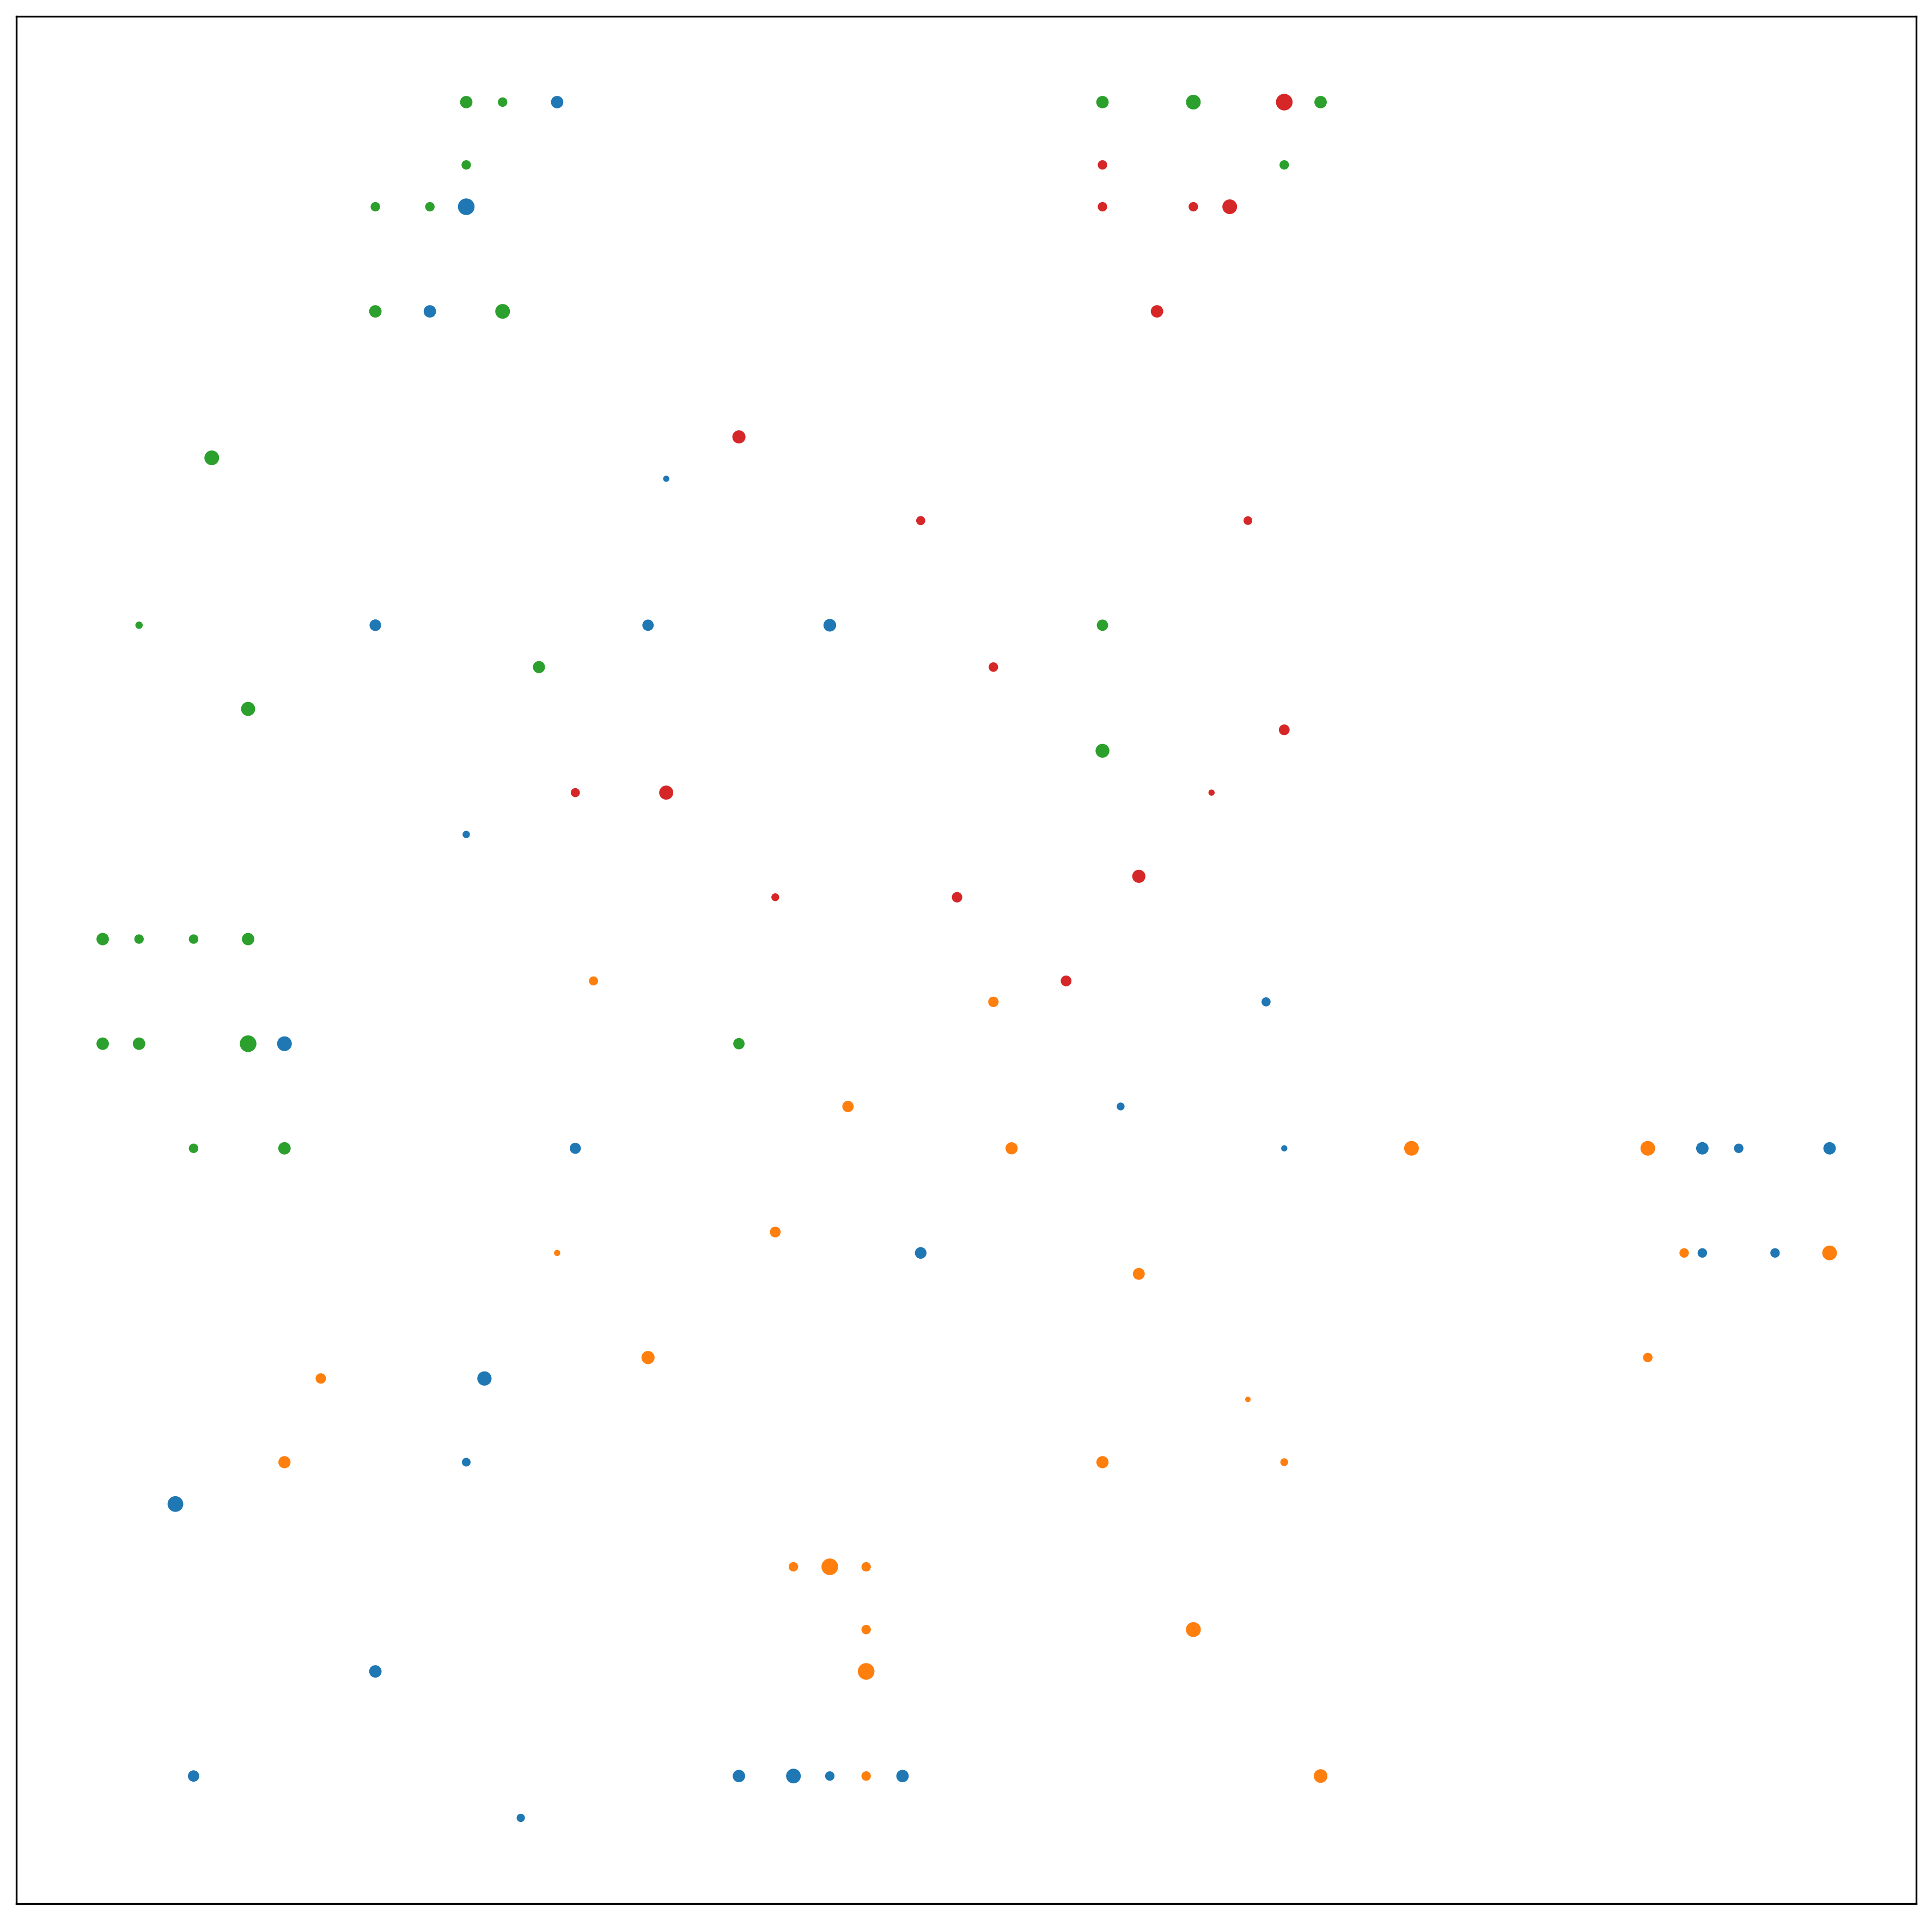

In [94]:
from itertools import cycle
col = cycle(colors.TABLEAU_COLORS)
pos = {point['number']: (point['x'], point['y']) for point in points}

fig, ax = plt.subplots(figsize=(15,15), dpi=300)

for path in paths:
    path_color = next(col)
    nodes_in_path = {x for p in path for x in p}
    node_sizes = [point['demand'] for point in points if point['number'] in nodes_in_path]
    
    labels = {filter(lambda x: x['number'] in nodes_in_path, points)}
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_in_path, node_size=node_sizes, node_color=path_color, ax=ax)
plt.savefig("city_distribution.png", dpi=300)